In [63]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy

In [64]:
root_dir='/Users/robinruhm/Documents/Research/Fire Hydrology/SlaterFireHydrology';
data_dir=root_dir+'/data';
processed_dir =data_dir+'/Processed';
raw_dir=data_dir+'/Raw';
#precip_station='salmonriver'
#river='IndianCreek'

In [65]:
data_file=processed_dir+'/RiverFlowData.txt'

In [66]:
rivers = ['IndianCreek', 'WillowCreek', 'CacheCreek', 'SuckerCreek', 'JockoRiver','SalmonFallsCreek']
fire_year = {'IndianCreek': 2020, 'WillowCreek': 2020, 'CacheCreek': 2018, 'SuckerCreek': 2017, 'JockoRiver':2017,'SalmonFallsCreek': 2010}

In [67]:
df = pd.read_csv(data_file)



In [68]:
df['day_of_year'] = pd.to_datetime(summer_df['datetime']).dt.dayofyear
for river in rivers:
    df['decay_coef_' + river] = df['discharge_'+river]/(df['discharge_'+river] - df['discharge_'+ river + '_daily_change'])
    df['discharge_' + river + '_previous_day'] = (df['discharge_' + river] - df['discharge_' + river + '_daily_change'])
    df['discharge_' + river + '_daily_change_positive'] = -df['discharge_' + river + '_daily_change']
    df['post-fire_' + river] = df['year'] > fire_year[river]
    df['year_sum_discharge_' + river] = df.groupby('year')['discharge_'+river].transform('sum')
    df['month_sum_discharge_' + river] = df.groupby(['month', 'year'])['discharge_'+river].transform('sum')
    df['month_fraction_discharge_' + river] = df['month_sum_discharge_' + river]/df['year_sum_discharge_' + river]

summer_df = df[(df['month']>6) & (df['month']<11)]


In [69]:
df.head()

,Unnamed: 0,datetime,discharge_IndianCreek,discharge_IndianCreek_daily_change,discharge_WillowCreek,discharge_WillowCreek_daily_change,discharge_CacheCreek,discharge_CacheCreek_daily_change,discharge_SuckerCreek,discharge_SuckerCreek_daily_change,...,year_sum_discharge_JockoRiver,month_sum_discharge_JockoRiver,month_fraction_discharge_JockoRiver,decay_coef_SalmonFallsCreek,discharge_SalmonFallsCreek_previous_day,discharge_SalmonFallsCreek_daily_change_positive,post-fire_SalmonFallsCreek,year_sum_discharge_SalmonFallsCreek,month_sum_discharge_SalmonFallsCreek,month_fraction_discharge_SalmonFallsCreek
0,0.0,2012-01-01,391.0,NaN,6.4,NaN,5.69,NaN,143.0,NaN,...,28105.1,382.2,0.013599,0.975309,162.0,4.0,True,45662.7,4741.0,0.103827
1,1.0,2012-01-02,296.0,-95.0,4.1,-2.3,5.46,-0.23,113.0,-30.0,...,28105.1,382.2,0.013599,1.000000,158.0,-0.0,True,45662.7,4741.0,0.103827
2,2.0,2012-01-03,244.0,-52.0,4.1,0.0,5.40,-0.06,97.1,-15.9,...,28105.1,382.2,0.013599,0.993671,158.0,1.0,True,45662.7,4741.0,0.103827
3,3.0,2012-01-04,210.0,-34.0,4.1,0.0,5.40,0.00,86.6,-10.5,...,28105.1,382.2,0.013599,0.993631,157.0,1.0,True,45662.7,4741.0,0.103827
4,4.0,2012-01-05,188.0,-22.0,4.1,0.0,5.40,0.00,81.9,-4.7,...,28105.1,382.2,0.013599,1.000000,156.0,-0.0,True,45662.7,4741.0,0.103827


River = IndianCreek; post-fire = False; mean decay coef = 0.9625256101722199 +/- 8.825059483427353e-05
River = IndianCreek; post-fire = False; median decay coef = 0.9790026085998065
River = IndianCreek; post-fire = True; mean decay coef = 0.9738146677902597 +/- 0.00025742416225784764
River = IndianCreek; post-fire = True; median decay coef = 0.9872408293460925
River = WillowCreek; post-fire = False; mean decay coef = 0.9142372631360804 +/- 0.00024686426587360434
River = WillowCreek; post-fire = False; median decay coef = 0.9459459459459459
River = WillowCreek; post-fire = True; mean decay coef = 0.9448009172495161 +/- 0.0022006130757359394
River = WillowCreek; post-fire = True; median decay coef = 0.9736796536796537
River = CacheCreek; post-fire = False; mean decay coef = 0.860099497692649 +/- 0.0005540752283444775
River = CacheCreek; post-fire = False; median decay coef = 0.9176356589147288
River = CacheCreek; post-fire = True; mean decay coef = 0.8874697841005712 +/- 0.00065990587465

/var/folders/1k/s33lj1kd7px7nbb93v5jzphc0000gn/T/ipykernel_93396/4153499447.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (9, 6))


River = JockoRiver; post-fire = False; mean decay coef = 0.9676405885751005 +/- 5.578975667324249e-05
River = JockoRiver; post-fire = False; median decay coef = 0.9740680031942168
River = JockoRiver; post-fire = True; mean decay coef = 0.9642836052646838 +/- 7.516844910638909e-05
River = JockoRiver; post-fire = True; median decay coef = 0.9726609862640556
River = SalmonFallsCreek; post-fire = False; mean decay coef = 0.9260716523157114 +/- 0.0001332489947717673
River = SalmonFallsCreek; post-fire = False; median decay coef = 0.950363196125908
River = SalmonFallsCreek; post-fire = True; mean decay coef = 0.9166573695134789 +/- 0.00012272852978336272
River = SalmonFallsCreek; post-fire = True; median decay coef = 0.9416666666666667


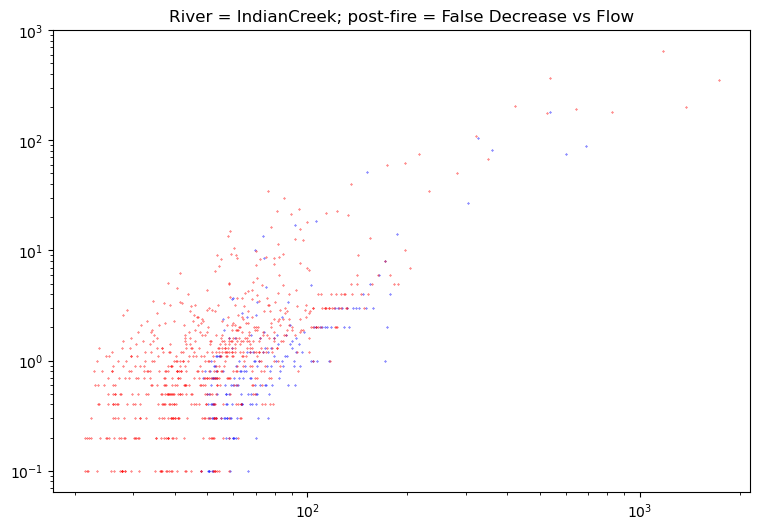

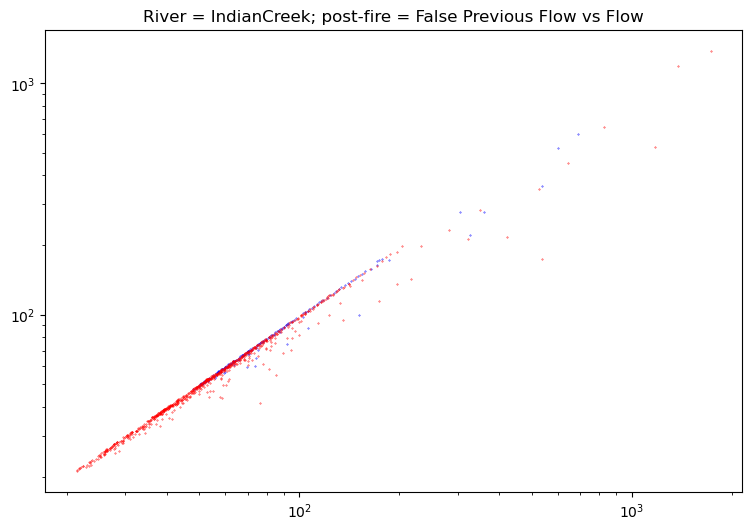

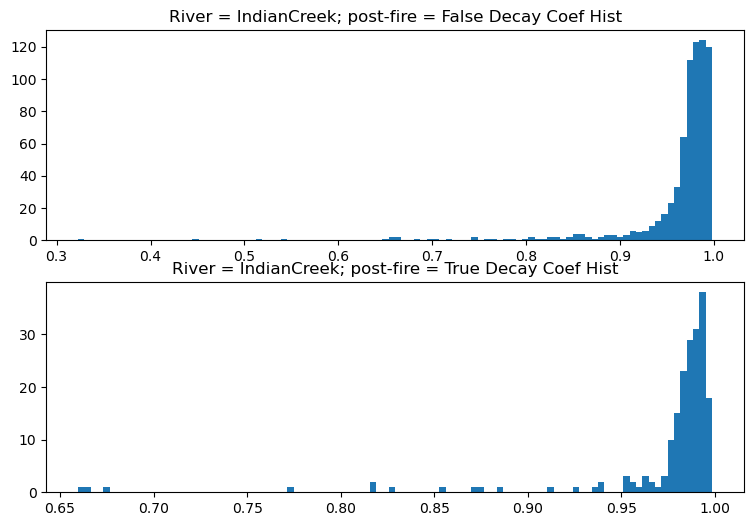

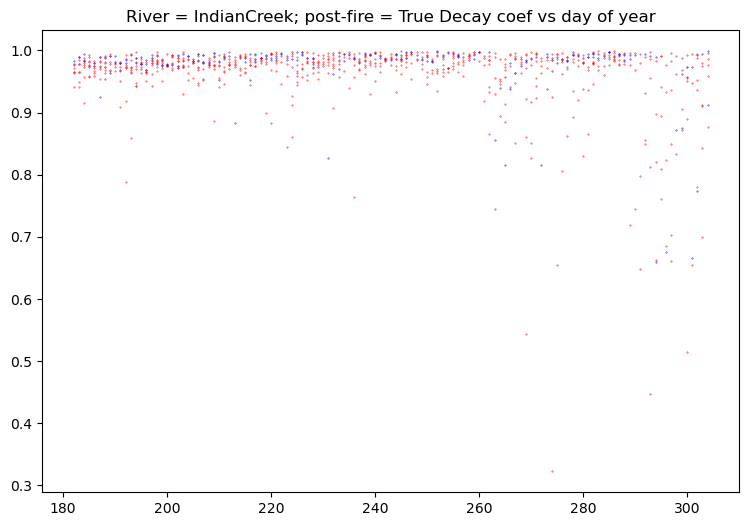

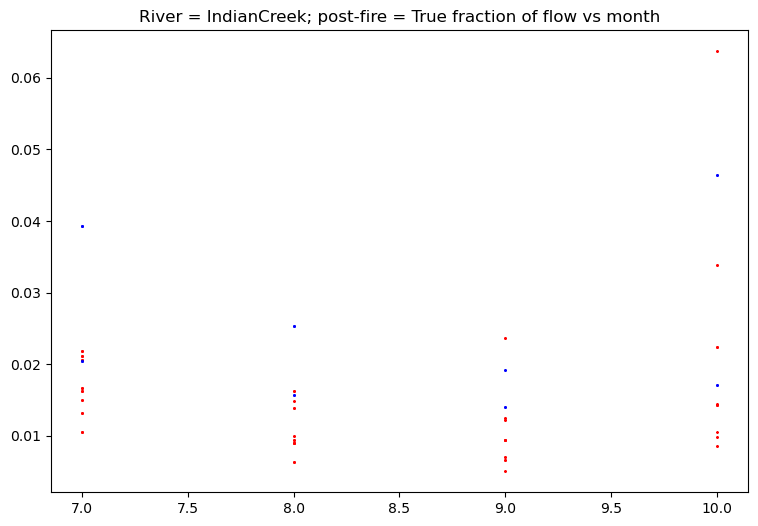

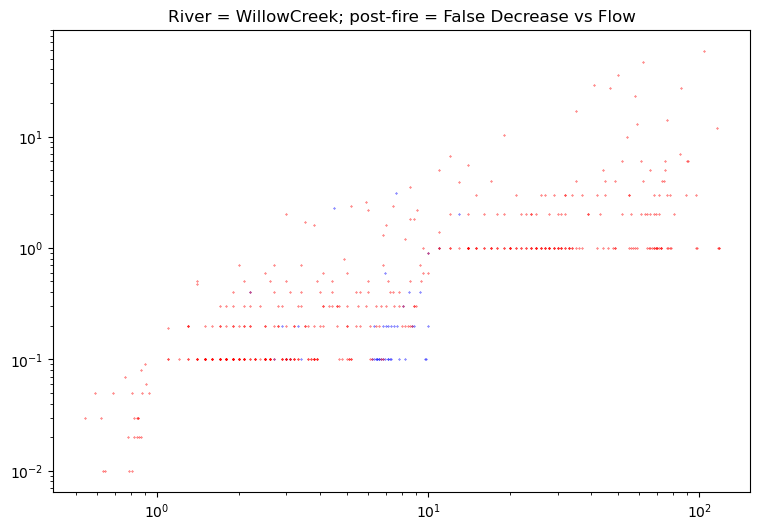

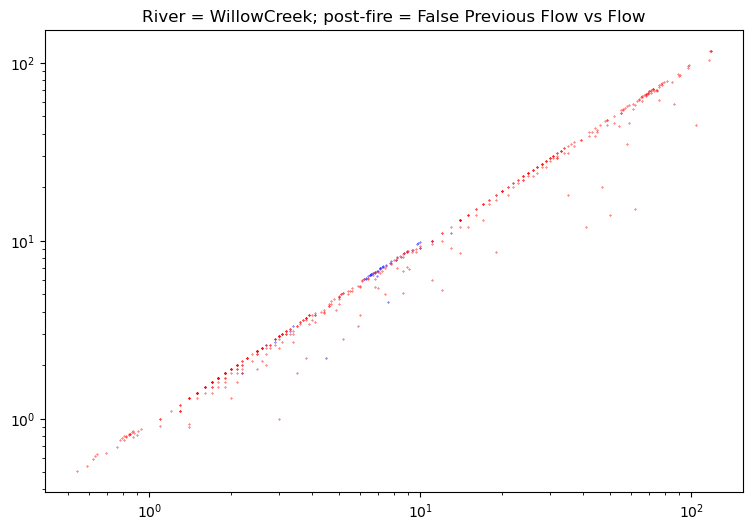

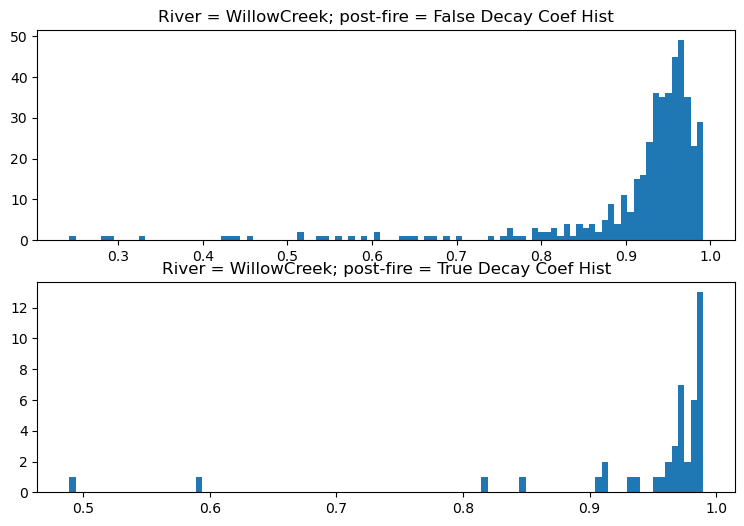

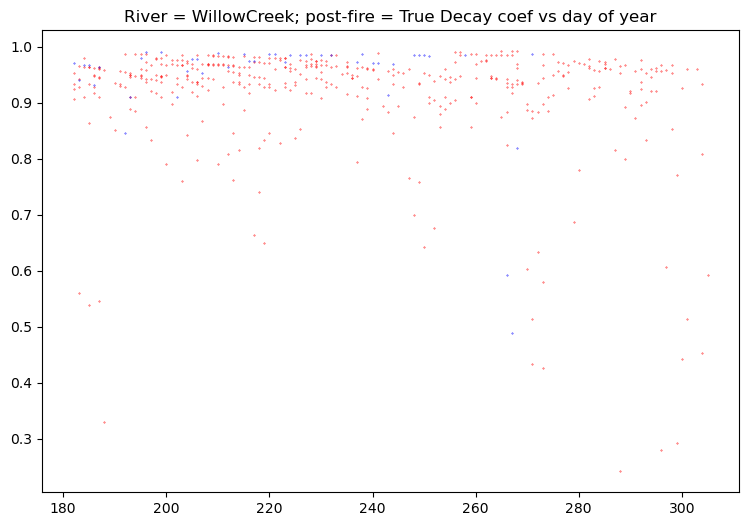

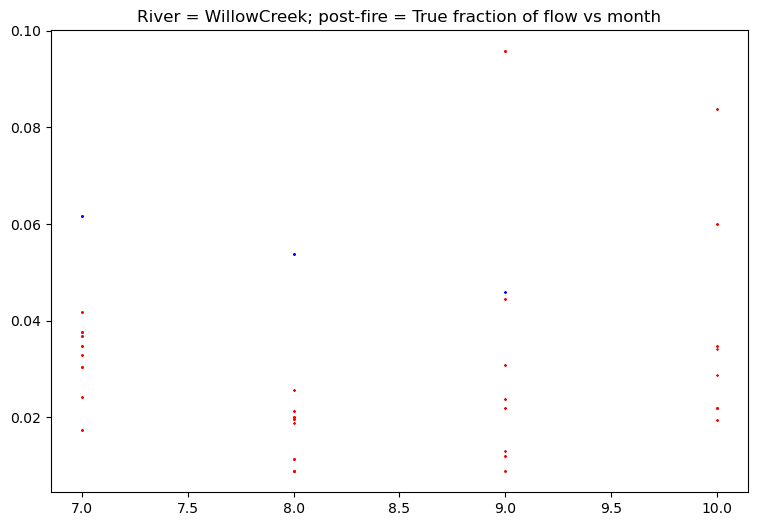

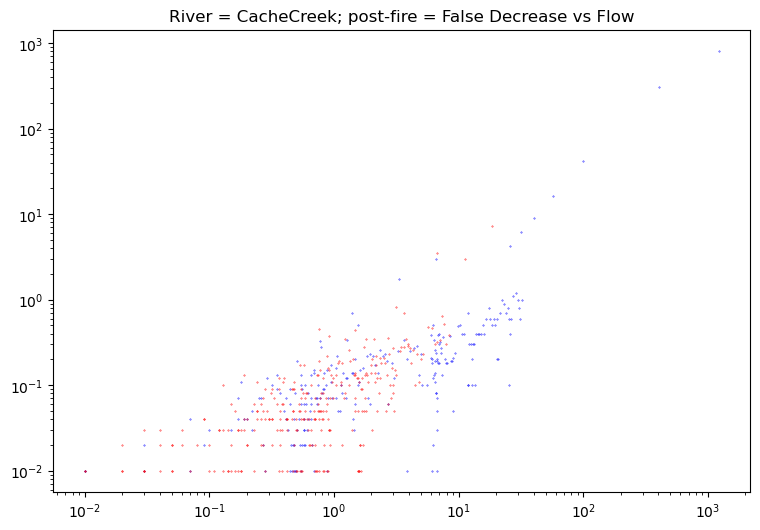

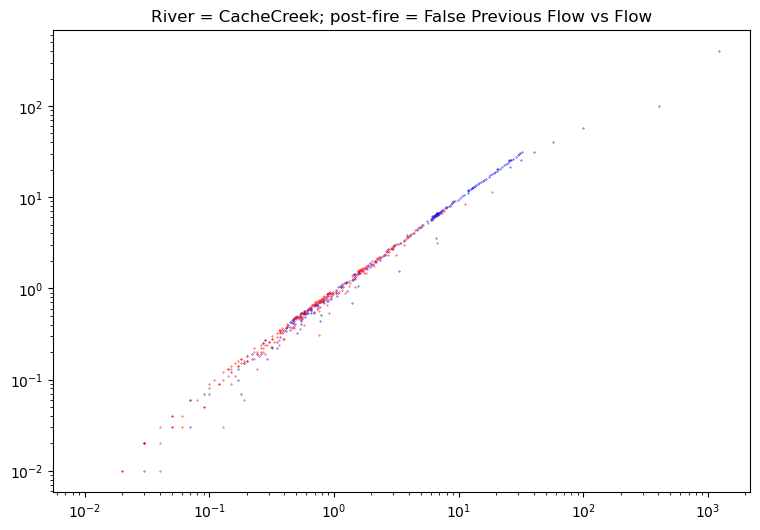

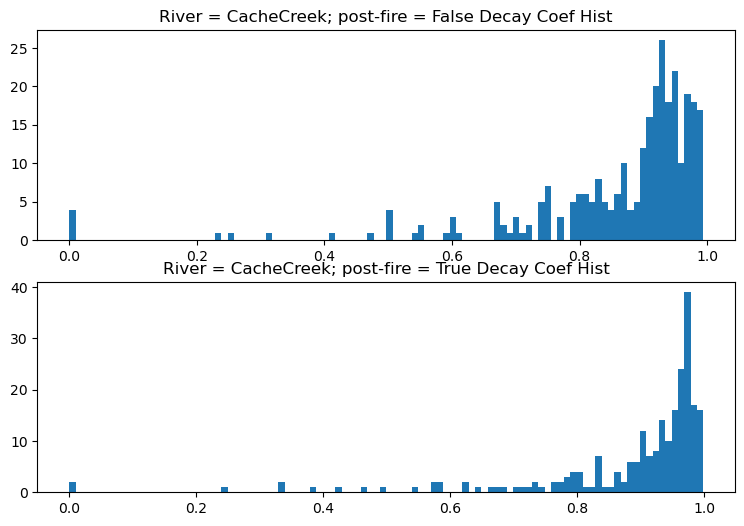

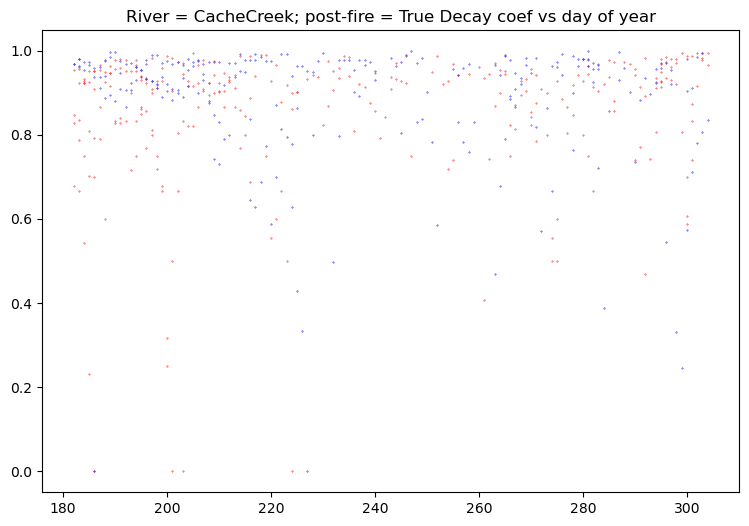

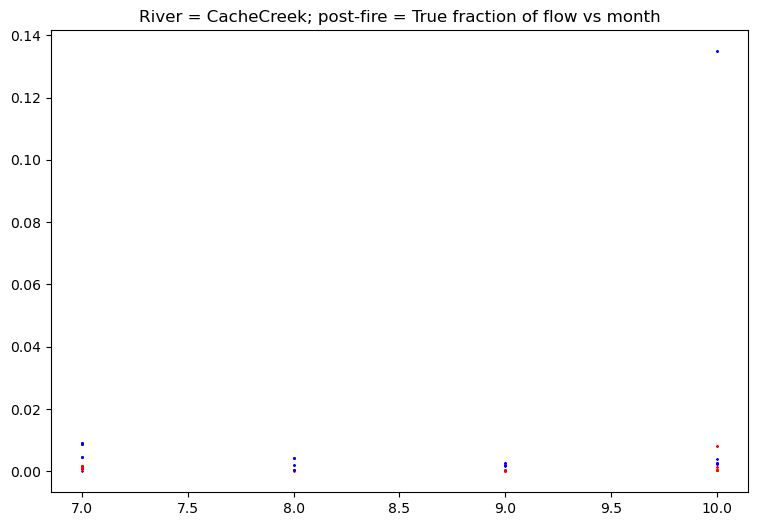

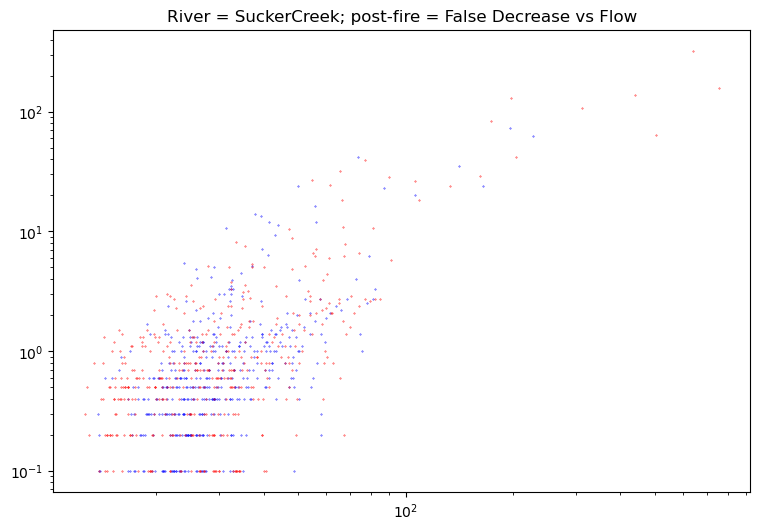

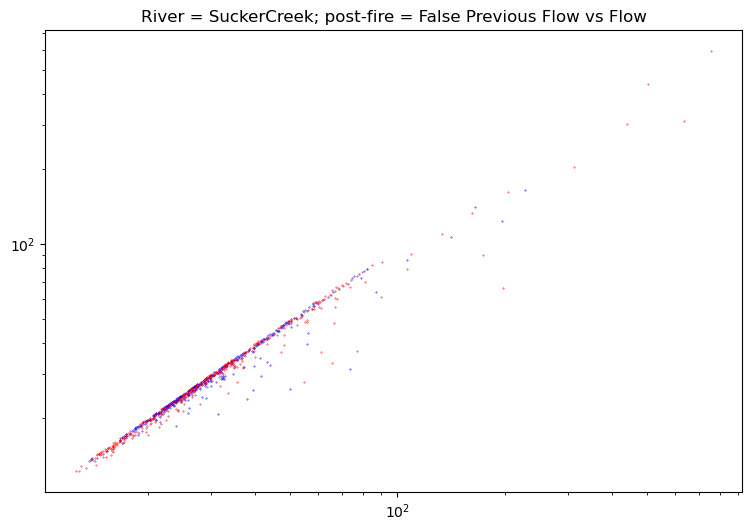

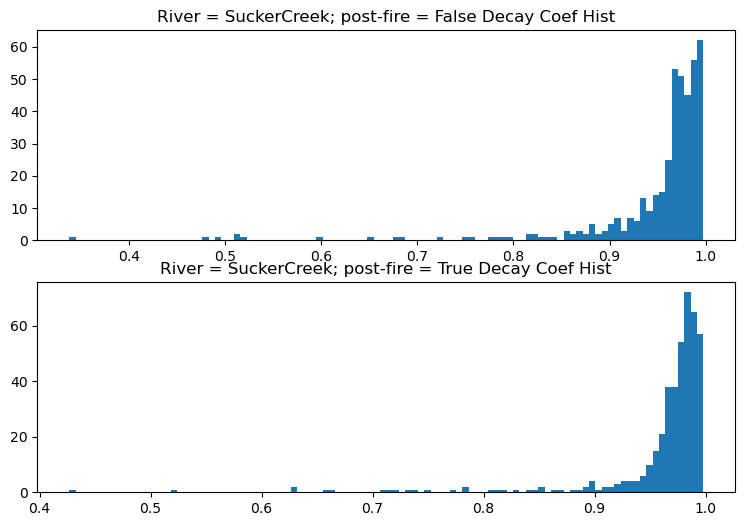

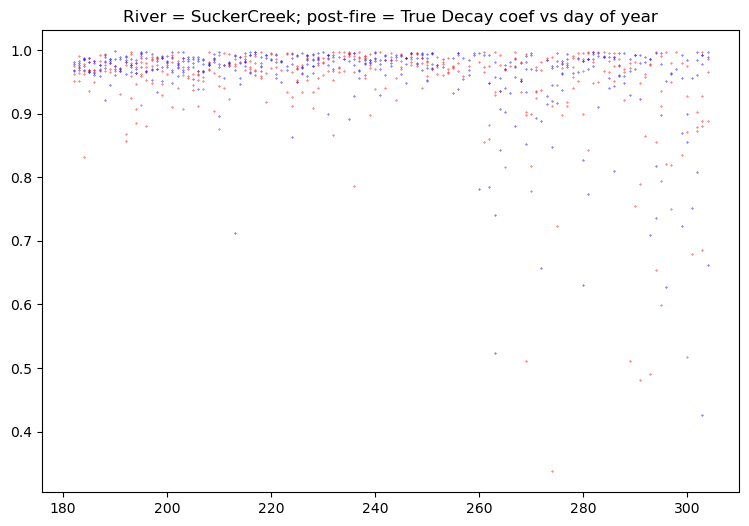

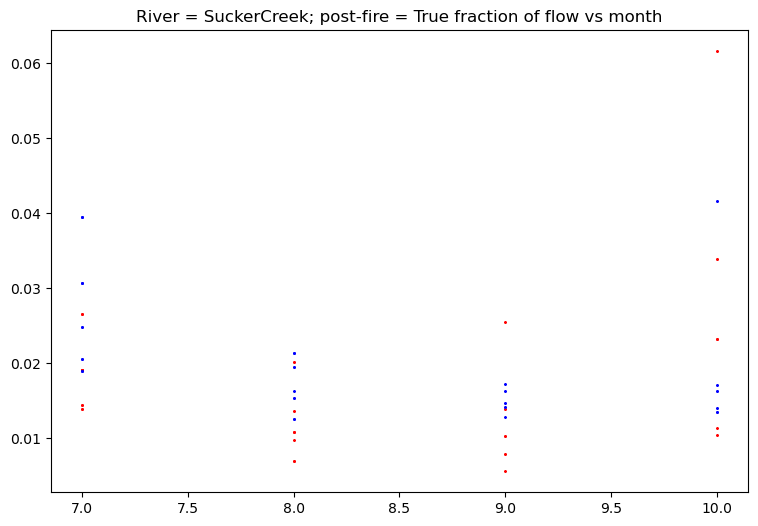

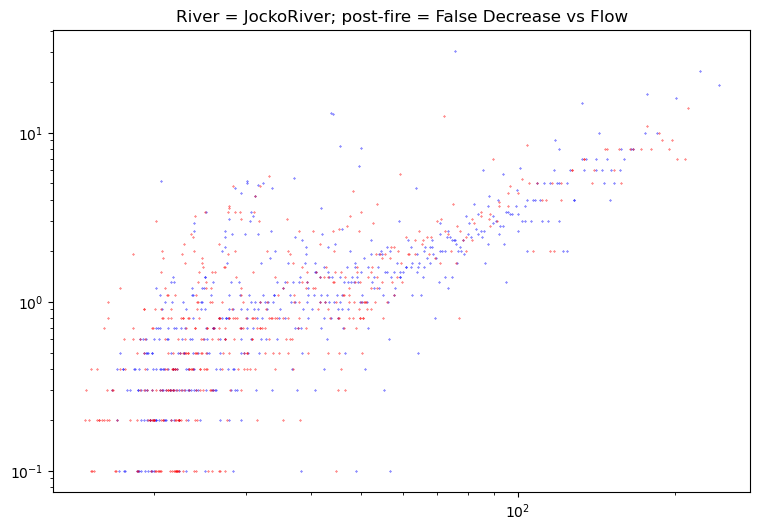

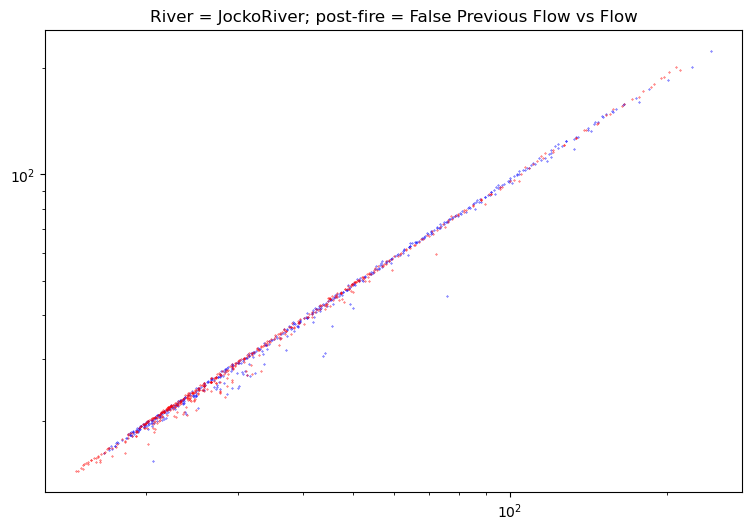

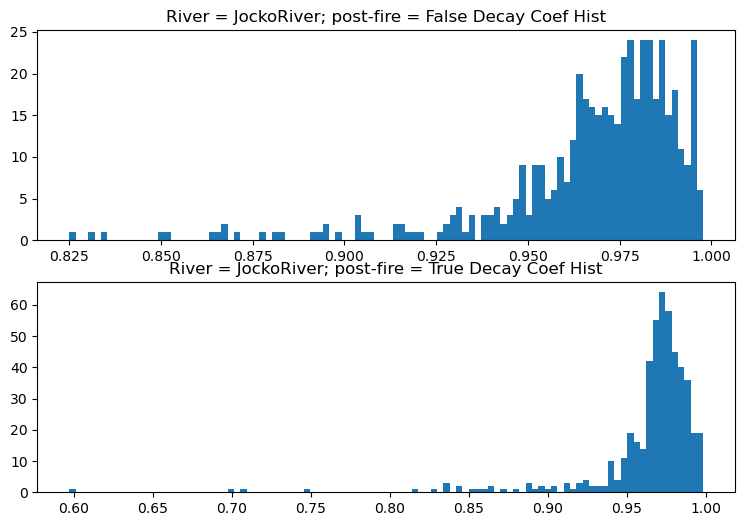

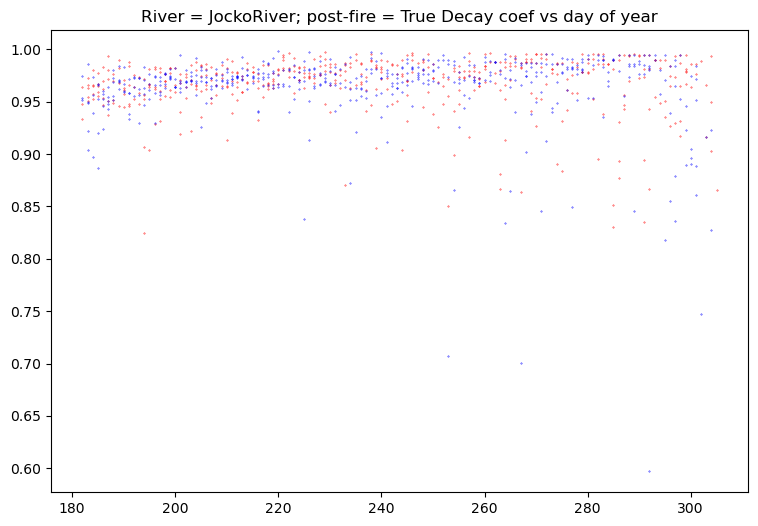

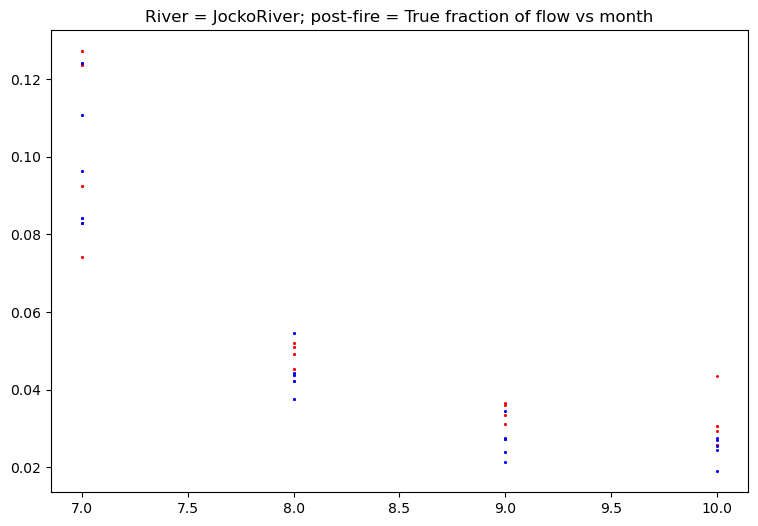

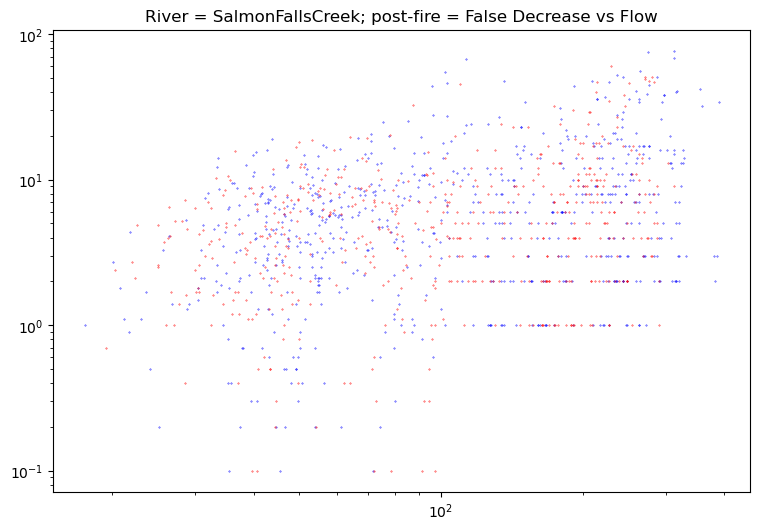

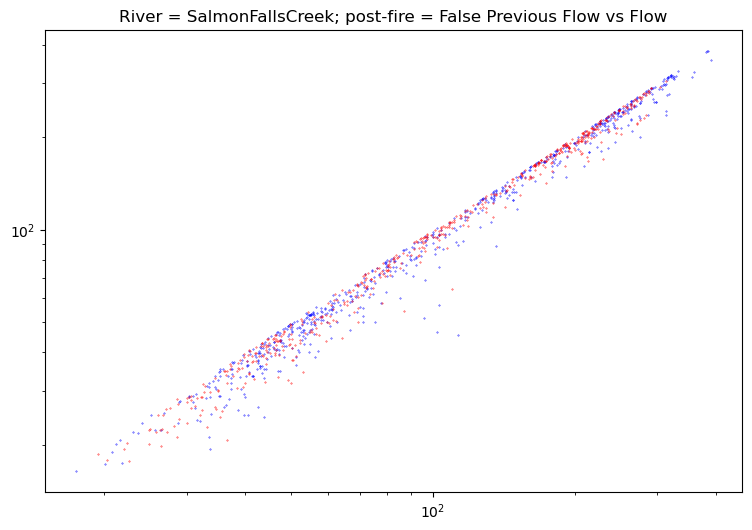

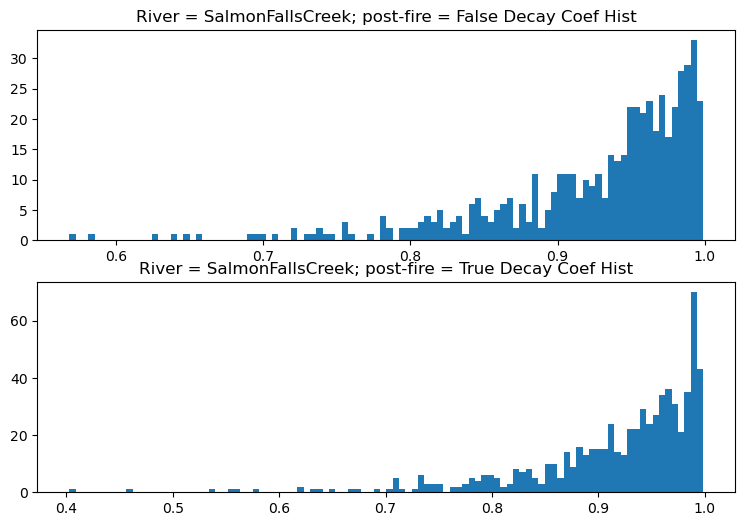

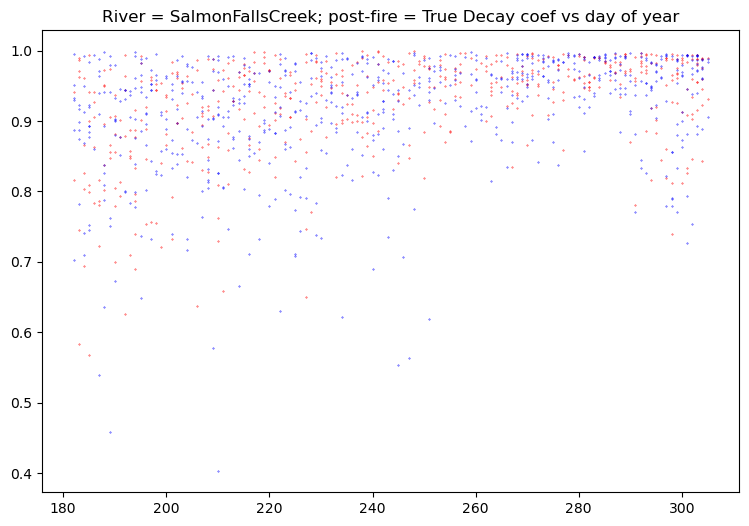

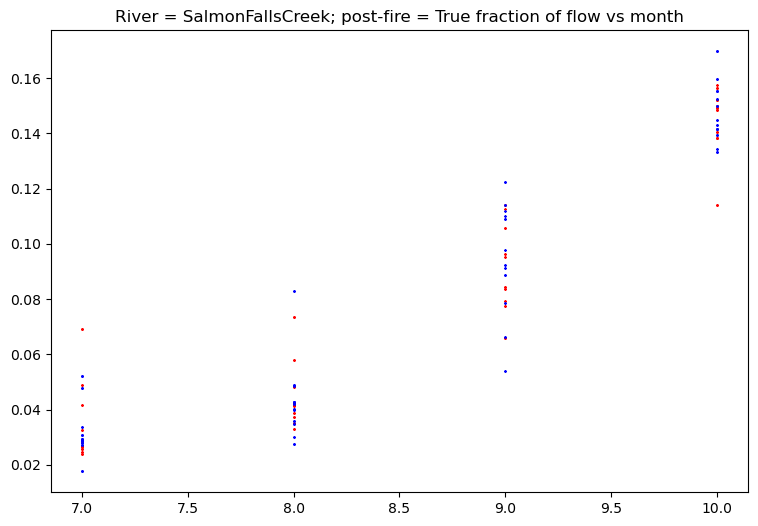

In [70]:
for river in rivers:
    decrease_df = summer_df[summer_df['discharge_' + river + '_daily_change'] < 0]

    decrease_df= decrease_df.drop(decrease_df[decrease_df['year']==fire_year[river]].index)

    fig, ax = plt.subplots(figsize = (9, 6))
    for (v, c) in [(1, 'b'), (0, 'r')]:
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['discharge_'+ river + '_previous_day'], decrease_df[decrease_df['post-fire_' + river] == v]['discharge_' + river + '_daily_change_positive'], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Decrease vs Flow')
    ax.set_xscale("log")
    ax.set_yscale("log")
    fig, ax = plt.subplots(figsize = (9, 6))
    for (v, c) in [(1, 'b'), (0, 'r')]:
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['discharge_'+ river + '_previous_day'], decrease_df[decrease_df['post-fire_' + river] == v]['discharge_' + river], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Previous Flow vs Flow')
    ax.set_xscale("log")
    ax.set_yscale("log")
    fig, ax = plt.subplots(2, figsize = (9, 6))
    for (v, c) in [(0, 'r'), (1, 'b')]:
        ax[v].hist(decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river], 100)
        ax[v].set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Decay Coef Hist')
        print('River = ' + river + '; post-fire = ' + str(bool(v)) + '; mean decay coef = ' + str(decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river].mean()) + \
             ' +/- ' + str(decrease_df[decrease_df['post-fire_'+river] == v]['decay_coef_' + river].std()/decrease_df[decrease_df['post-fire_'+river] == v]['decay_coef_' + river].count()))
        print('River = ' + river + '; post-fire = ' + str(bool(v)) + '; median decay coef = ' + str(decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river].median()))

    fig, ax = plt.subplots(figsize = (9, 6))    
    for (v, c) in [(0, 'r'), (1, 'b')]:    
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['day_of_year'], decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Decay coef vs day of year')


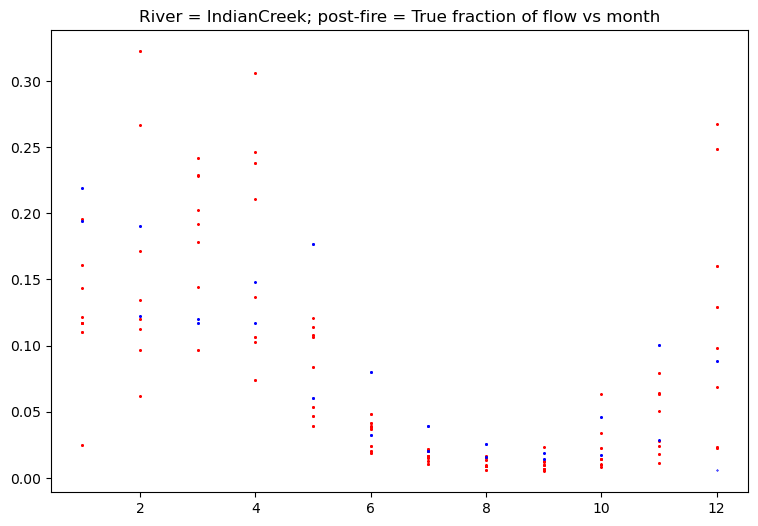

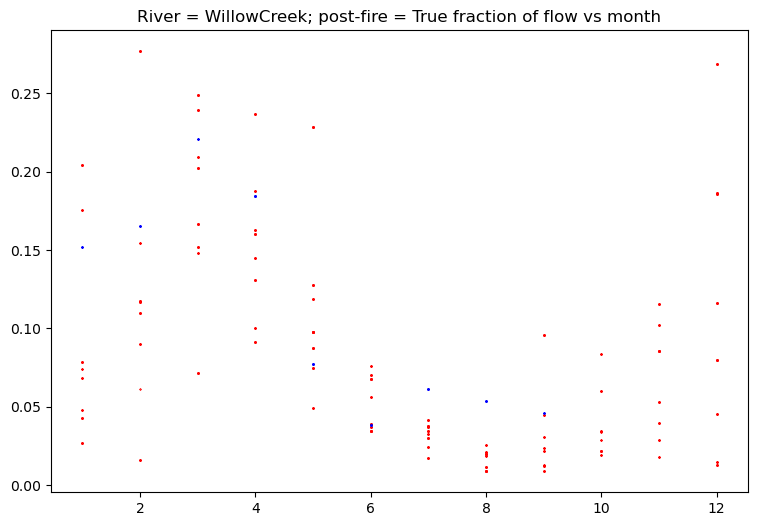

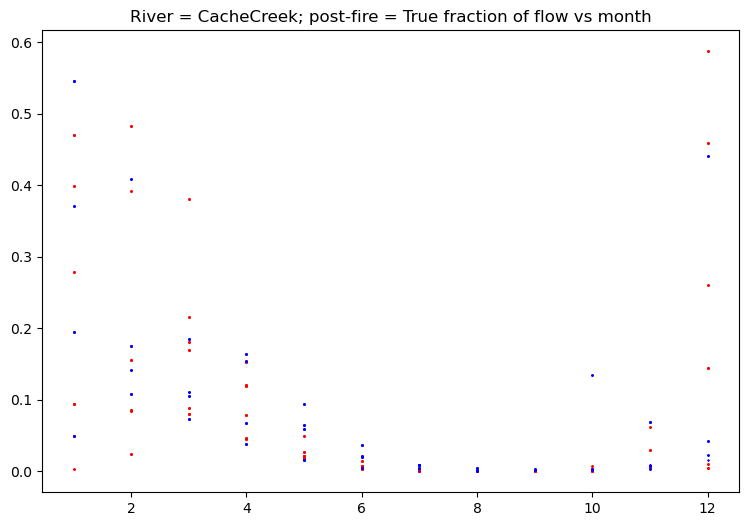

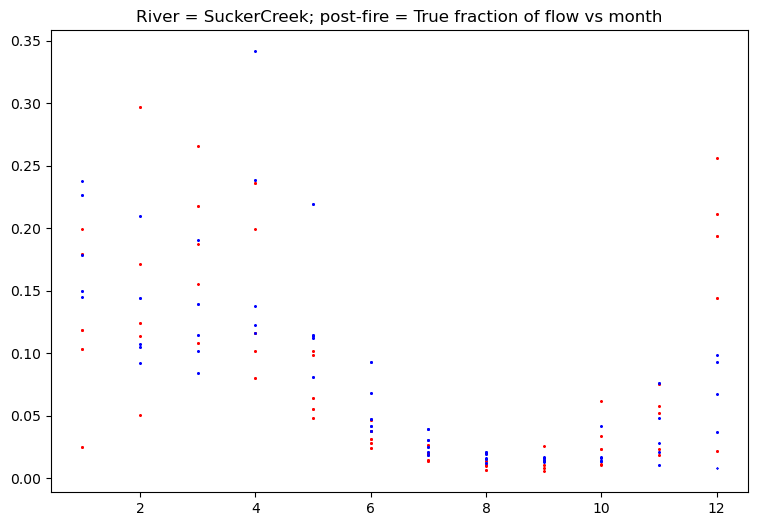

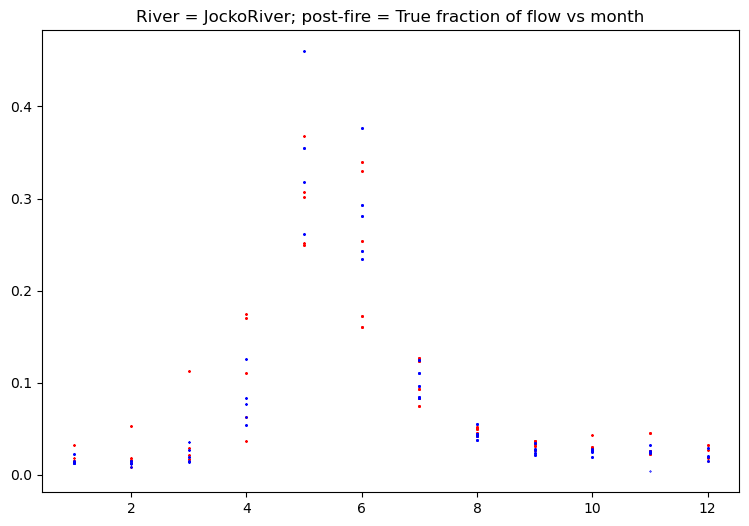

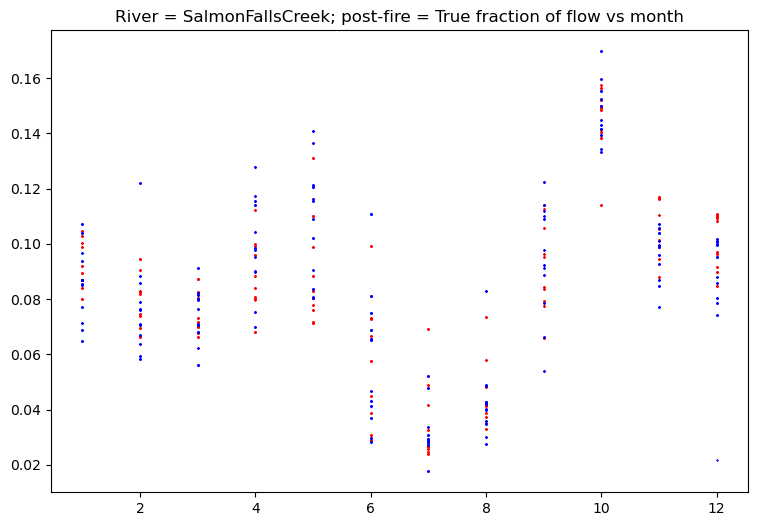

In [74]:
#summer_df = df[(df['month']>0) & (df['month']<13)]

for river in rivers:
    decrease_df = df[df['discharge_' + river + '_daily_change'] < 0]
    decrease_df= decrease_df.drop(decrease_df[decrease_df['year']==fire_year[river]].index)
    fig, ax = plt.subplots(figsize = (9, 6))    
    for (v, c) in [(0, 'r'), (1, 'b')]:    
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['month'], decrease_df[decrease_df['post-fire_' + river] == v]['month_fraction_discharge_' + river], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' fraction of flow vs month')
        

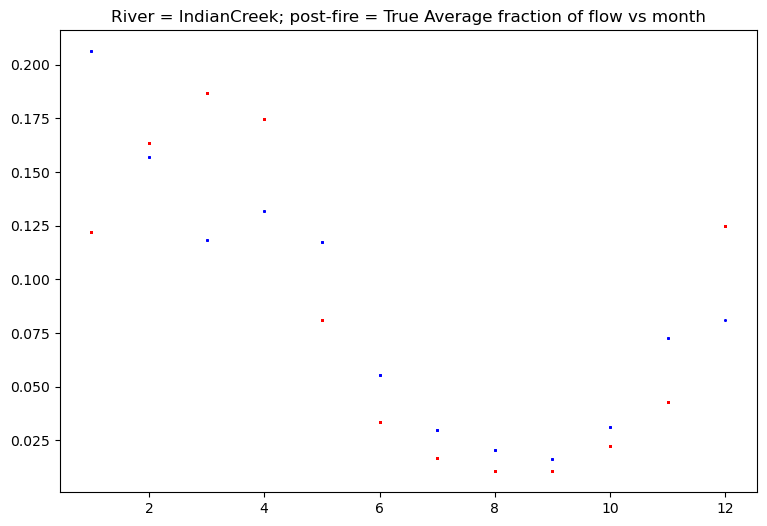

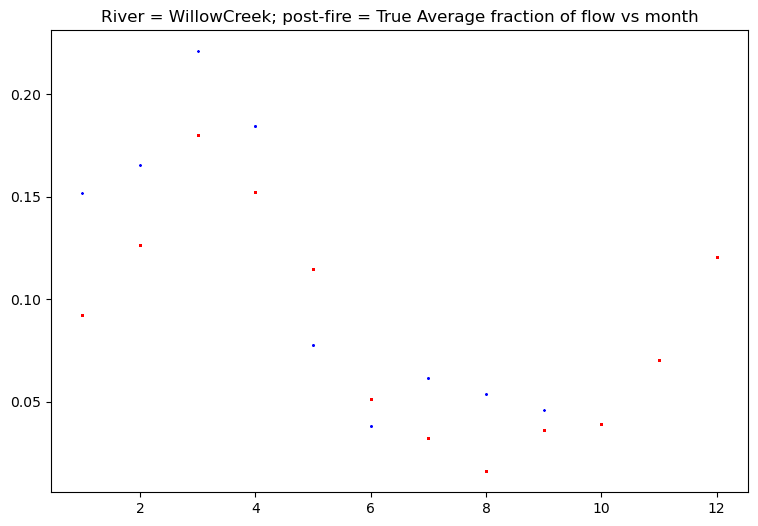

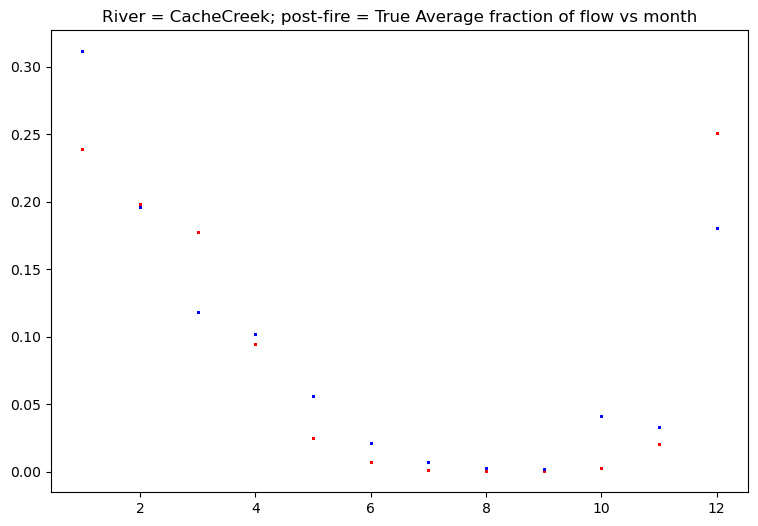

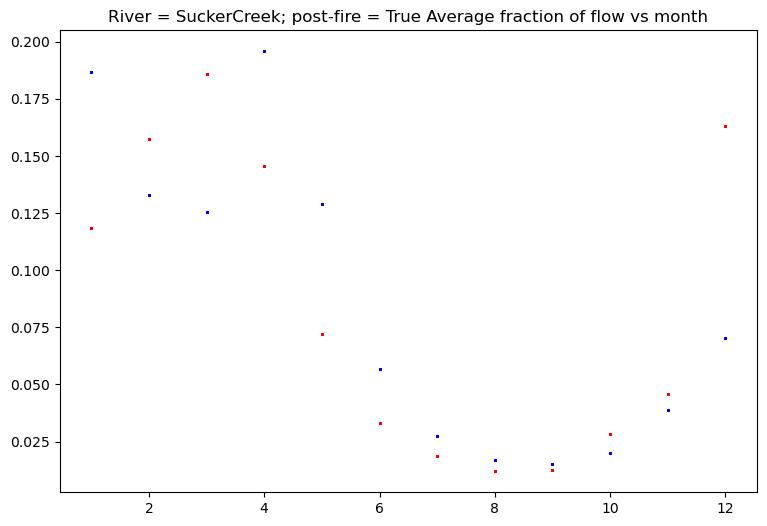

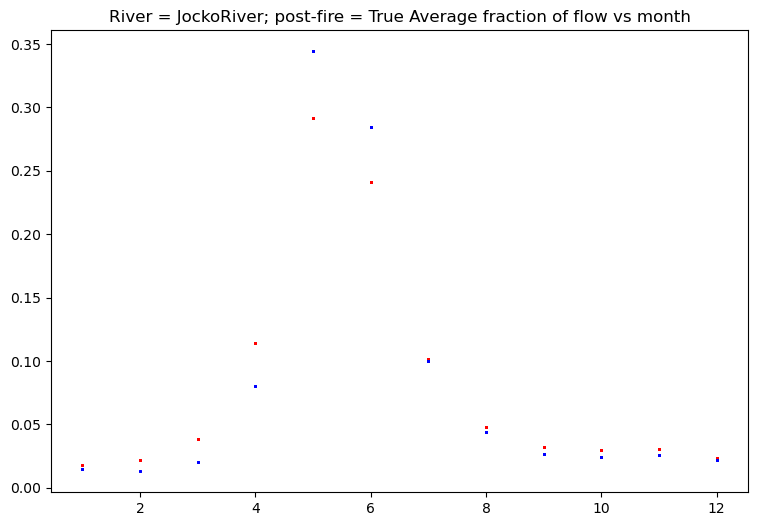

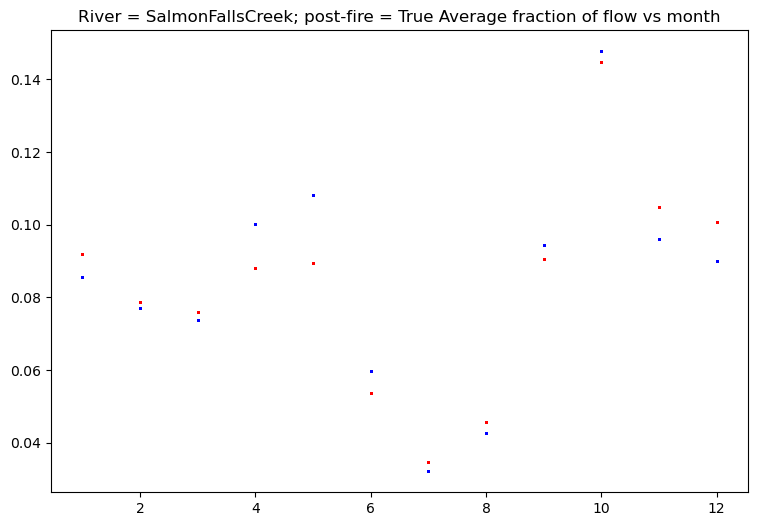

In [78]:
#summer_df = df[(df['month']>0) & (df['month']<13)]

for river in rivers:
    decrease_df = df[df['discharge_' + river + '_daily_change'] < 0]
    decrease_df= decrease_df.drop(decrease_df[decrease_df['year']==fire_year[river]].index)
    decrease_df['month_fraction_discharge_average_' + river] = decrease_df.groupby(['month', 'post-fire_' + river])['month_fraction_discharge_' +river].transform('mean')
    fig, ax = plt.subplots(figsize = (9, 6))    
    for (v, c) in [(0, 'r'), (1, 'b')]:    
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['month'], decrease_df[decrease_df['post-fire_' + river] == v]['month_fraction_discharge_average_' + river], s = .1,c=c)
        ax.set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Average fraction of flow vs month')
        

In [71]:
pd.to_datetime(summer_df['datetime']).dt.dayofyear

182     183
183     184
184     185
185     186
186     187
       ... 
8311    300
8312    301
8313    302
8314    303
8315    304
Name: datetime, Length: 2829, dtype: int64